## Task : Prediction using Decision Tree Algorithm

## Project By : Tushar Dalvi

### Dataset : https://bit.ly/3kXTdox

### Importing the Liabraries 

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Importing the dataset

In [9]:
iris = pd.read_csv("iris.data", names =["Sepal length","Sepal Width","Petal length","Petal Width","Species"])

In [7]:
iris

,Sepal length,Sepal Width,Petal length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
iris.head()

,Sepal length,Sepal Width,Petal length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris.tail()

,Sepal length,Sepal Width,Petal length,Petal Width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Analysing the Data

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris.shape

(150, 5)

In [12]:
iris.describe

<bound method NDFrame.describe of      Sepal length  Sepal Width  Petal length  Petal Width         Species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [17]:
iris.columns

Index(['Sepal length', 'Sepal Width', 'Petal length', 'Petal Width',
       'Species'],
      dtype='object')

In [20]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### Visualization

<AxesSubplot:xlabel='Species', ylabel='Petal Width'>

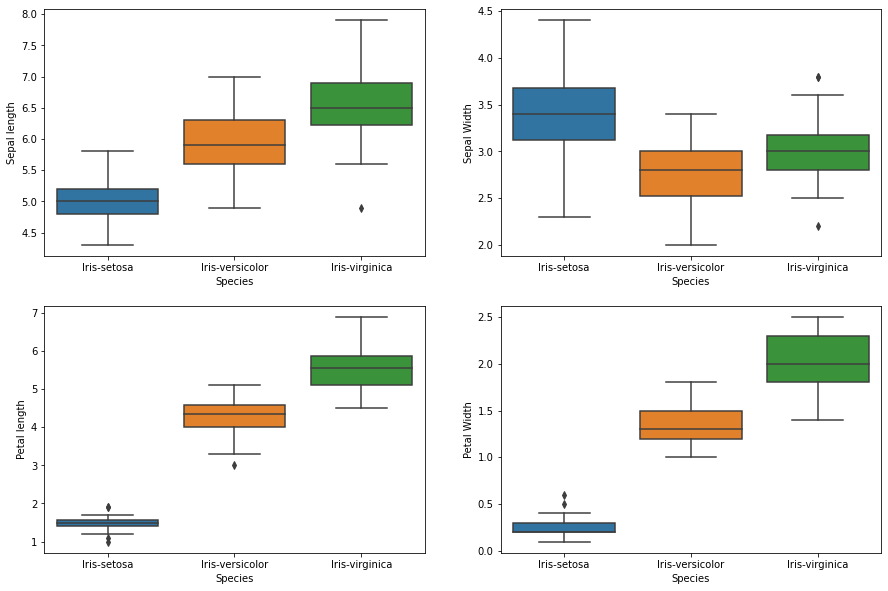

In [22]:
plt.figure(figsize =(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='Sepal length',data = iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='Sepal Width', data = iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='Petal length', data = iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='Petal Width', data = iris)

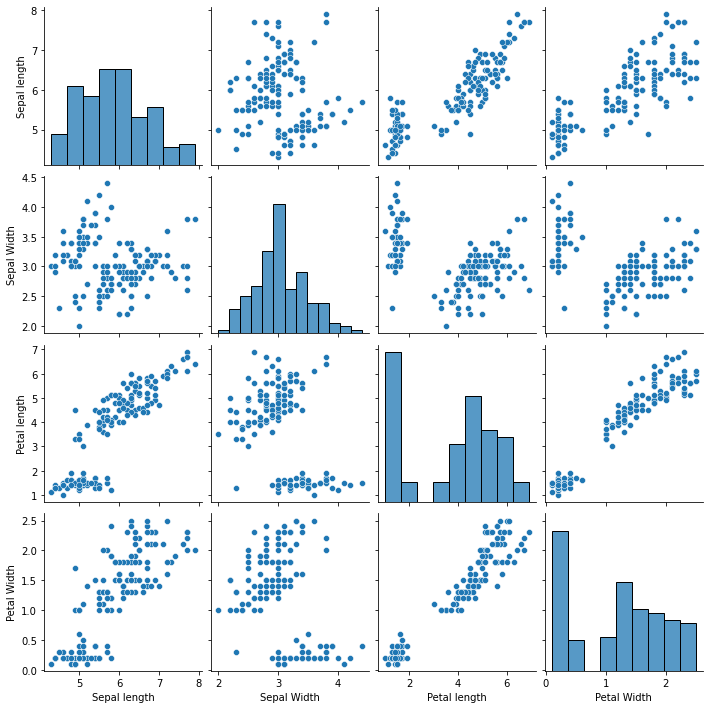

In [23]:
sns.pairplot(iris)

### Pairplot

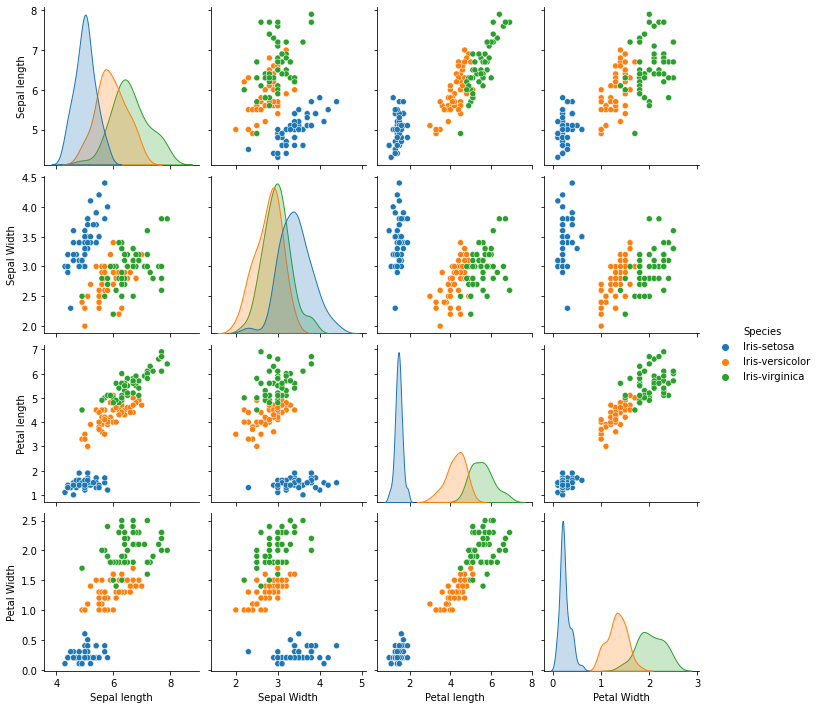

In [25]:
sns.pairplot(data=iris, hue='Species')

<AxesSubplot:>

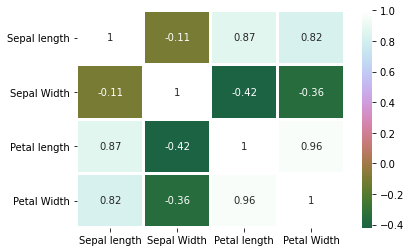

In [29]:
# Corelation between features
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix', center=0, linewidths=1.9)

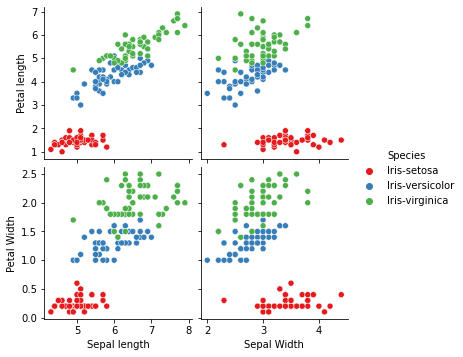

In [33]:
#this plot depicts corelation between sepal length/width, petal length/width
sns.pairplot(iris, x_vars=['Sepal length', 'Sepal Width'],
            y_vars=['Petal length', 'Petal Width'], hue='Species',palette='Set1')

### Splitting the data into training and test sets


In [10]:
x = iris.drop(['Species'], 1)
y = iris['Species']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 0)

In [11]:
x_train.head()

,Sepal length,Sepal Width,Petal length,Petal Width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [12]:
y_train.head()

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
Name: Species, dtype: object

### Training the Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state =20)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

### Evaluating the Decision Tree Classifier

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuray:{accuracy}")

Accuray:0.9777777777777777


In [20]:
print(f"Confusion matrix: \n{confusion_matrix(y_test, y_pred)}")

Confusion matrix: 
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [21]:
print(f")classification_report: \n\n{classification_report(y_test, y_pred)}")

)classification_report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### Visualising the Decision tree classifier

In [24]:
features = iris.columns[:-1]
classes = iris['Species'].unique().tolist()

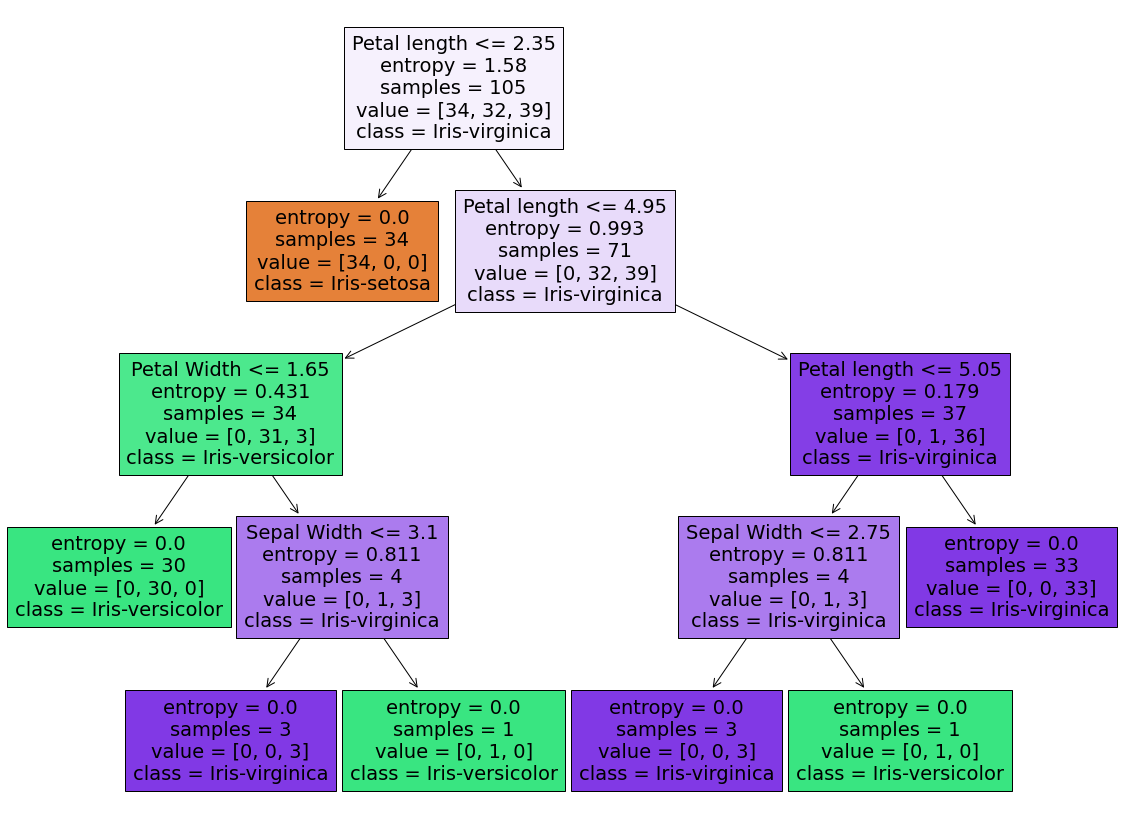

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,15))
plot_tree(classifier, feature_names=features, class_names=classes, filled =True)
plt.show()

### Testing predictions on sample data

In [30]:
test_pred1 = classifier.predict([[4.5,3.3,1.6,0.3]])
print(test_pred1[0])

Iris-setosa


In [31]:
test_pred2 = classifier.predict([[6.5,4.5,4.6,2.5]])
print(test_pred2[0])

Iris-versicolor


In [32]:
test_pred3 = classifier.predict([[7.1,7.5,8.8,3.6]])
print(test_pred3[0])

Iris-virginica


### Thank You